In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

In [3]:
# List all split files
split_files = sorted(glob.glob("split_*.csv"))

# Merge files
df_list = [pd.read_csv(file) for file in split_files]
file = pd.concat(df_list, ignore_index=True)

# SPATIAL AGGREGATIONS

In [4]:
#Q1
#Which state (consider all stations in that state) has the highest average PM2.5 concentration across all stations and across all years?
avg = file.groupby('state')['PM2.5'].mean().idxmax()

print(avg)

Delhi


In [5]:
#Q2
#Which state (consider all stations in that state) had the most days with hazardous PM2.5 levels (above 300 µg/m³) for the year 2023?

data_file = file

most_hazardous = data_file['PM2.5'] > 300
data_2023 = data_file['Timestamp'].str.contains('2023')

combined = most_hazardous & data_2023

filtered_data = data_file[combined]
lst_state_w_most_haz = filtered_data.groupby('state')['PM2.5'].max()
state_w_max_haz = lst_state_w_most_haz.idxmax()

print(state_w_max_haz)

Delhi


In [6]:
#Q3
#Which state has the highest variability in PM2.5 levels across its monitoring stations in 2023?

data_file = file

variability = data_file.groupby('state')['PM2.5'].std()
highest_variability = variability.idxmax()

print(highest_variability)

Delhi


In [7]:
#Q4
#Which state has the lowest average PM2.5 levels during the Covid period (The year 2020-2021 both years inclusive)?

data_file = file

year_2020 = data_file['Timestamp'].str.contains('2020')
year_2021 = data_file['Timestamp'].str.contains('2021')

both_20_and_21 = year_2020 | year_2021

filtered_data_file = data_file[both_20_and_21]
average = filtered_data_file.groupby('state')['PM2.5'].mean()
lowest_average = average.idxmin()

print(lowest_average)

Mizoram


# TEMPORAL AGGREGATION

In [8]:
#Q1
#Report the station that recorded the highest value of PM 2.5 for the month Aug of 2020.

data_file = file

data_of_aug_2020 = data_file[data_file['Timestamp'].str.contains('2020-08')]
lst_stations_max_pm = data_of_aug_2020.groupby('station')['PM2.5'].max()
highest_val_stn = lst_stations_max_pm.idxmax()
print(highest_val_stn)

Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB


In [9]:
#Q2
# For the year 2018, calculate the average PM2.5 concentration for each season 
# (Seasons being Winter: December-February, Summer: March-May, and Monsoon: June-September) 
# for stations Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB. 
# Identifying the season with the highest pollution.

data_file = file
data_2018 = data_file[data_file['Timestamp'].str.contains('2018')]

stn = 'Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB'
data_stn = data_2018[data_2018['station'] == stn]

winter_data_2018 = data_stn[pd.to_datetime(data_stn['Timestamp']).dt.month.isin([12,1,2])]
summer_data_2018 = data_stn[pd.to_datetime(data_stn['Timestamp']).dt.month.isin([3,4,5])]
monsoon_data_2018 = data_stn[pd.to_datetime(data_stn['Timestamp']).dt.month.isin([6,7,8,9])]

max_winter_poll = winter_data_2018['PM2.5'].max()
max_summer_poll = summer_data_2018['PM2.5'].max()
max_monsoon_poll = monsoon_data_2018['PM2.5'].max()

dict_max = {'Winter': max_winter_poll, 'Summer': max_summer_poll, 'Monsoon': max_monsoon_poll}
max_key = max(dict_max, key = dict_max.get)
print(f'{max_key} : {dict_max[max_key]}')
print("\nWe feel like monsoon can be more polluted as compared to others as the rains bring down the pollutants with itself and the low wind speeds take time to get rid of them.")

Monsoon : 488.67210526315785

We feel like monsoon can be more polluted as compared to others as the rains bring down the pollutants with itself and the low wind speeds take time to get rid of them.


C:\Users\shahk\AppData\Local\Temp\ipykernel_21292\80198209.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_stn_2021['month'] = pd.to_datetime(data_stn_2021['Timestamp']).dt.month


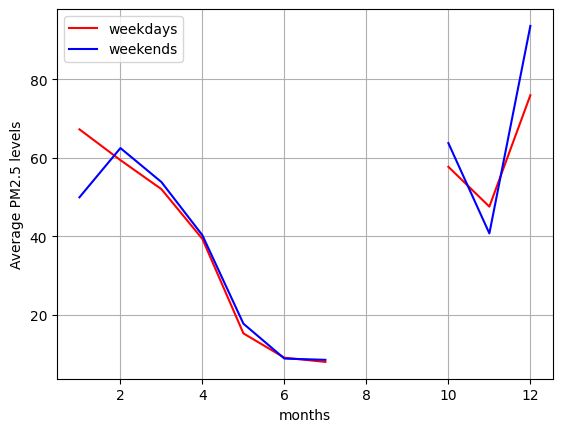

In [10]:
#Q3
#Compare average PM2.5 levels during weekends and weekdays for the station Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB over the year 2021

data_file = file
data_2021 = data_file[data_file['Timestamp'].str.contains('2021')]
data_stn_2021 = data_2021[data_2021['station'] == 'Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB']


data_stn_2021['month'] = pd.to_datetime(data_stn_2021['Timestamp']).dt.month

weekdays_data = data_stn_2021[pd.to_datetime(data_stn_2021['Timestamp']).dt.weekday<=5]
weekend_data = data_stn_2021[pd.to_datetime(data_stn_2021['Timestamp']).dt.weekday>5]
grouped_weekdays_avg = weekdays_data.groupby('month')['PM2.5'].mean()
grouped_weekends_avg = weekend_data.groupby('month')['PM2.5'].mean()

fig, ax = plt.subplots()
ax.plot([x for x in range(1,13)], grouped_weekdays_avg, label = 'weekdays', color = 'r')
ax.plot([x for x in range(1,13)], grouped_weekends_avg, label = 'weekends', color = 'b')
ax.legend()
ax.grid(True)
ax.set_xlabel('months')
ax.set_ylabel('Average PM2.5 levels')
plt.show()

# SPATIO-TEMPORAL AGGREGATION

In [11]:
#Q1
#For each state, calculate the percentage increase or decrease in PM2.5 levels during monsoon months (June to September) 
# compared to summer months (March to May). Which state has the most difference (increase or decrease) for the year 2022?

data_file = file
data_2022 = data_file[pd.to_datetime(data_file['Timestamp']).dt.year == 2022]
avg_monsoon_data = data_2022[pd.to_datetime(data_2022['Timestamp']).dt.month.isin([6,7,8,9])].groupby('state')['PM2.5'].mean()
avg_summer_data = data_2022[pd.to_datetime(data_2022['Timestamp']).dt.month.isin([3,4,5])].groupby('state')['PM2.5'].mean()

avg_pm25 = pd.DataFrame({'summer': avg_summer_data, 'monsoon': avg_monsoon_data})
avg_pm25['difference'] = (avg_pm25['monsoon'] - avg_pm25['summer'])/(avg_pm25['summer']) * 100
max_pct_change = avg_pm25['difference'].abs().idxmax()

print(max_pct_change)

Assam


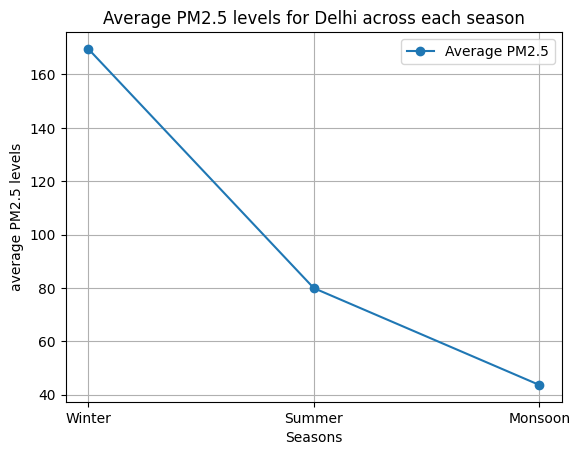

Seasonal variation observed is that there is a drop in pollution from winter to summer to monsoon.


In [12]:
#Q2
#Plot the average PM2.5 levels for Delhi across each season (Winter: December-February, Summer: March-May, Monsoon: June-September) from 
# 2017 to 2023. What seasonal variation, if any, can you observe in pollution levels?

data_file = file
data_file['Timestamp'] = pd.to_datetime(data_file['Timestamp'])
data_2017_to_2023 = data_file[data_file['Timestamp'].dt.year.isin([2017,2018,2019,2020,2021,2022,2023])]
delhi_data = data_2017_to_2023[data_2017_to_2023['state'] == 'Delhi']

winter_data = delhi_data[delhi_data['Timestamp'].dt.month.isin([12,1,2])]['PM2.5'].mean()
summer_data = delhi_data[delhi_data['Timestamp'].dt.month.isin([5,3,4])]['PM2.5'].mean()
monsoon_data = delhi_data[delhi_data['Timestamp'].dt.month.isin([6,7,8,9])]['PM2.5'].mean()

seasons = ['Winter', 'Summer', 'Monsoon']
avg_pm25 = [winter_data, summer_data, monsoon_data]

fig, ax = plt.subplots()
ax.plot(seasons, avg_pm25, label='Average PM2.5', marker='o')
ax.set_xlabel('Seasons')
ax.set_ylabel('average PM2.5 levels')
ax.set_title('Average PM2.5 levels for Delhi across each season')
ax.legend()
ax.grid(True)
plt.show()

print("""Seasonal variation observed is that there is a drop in pollution from winter to summer to monsoon.""")

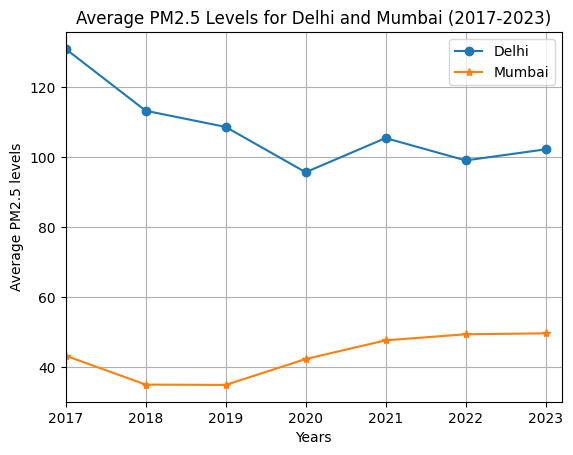

Delhi had more fluctuation with variance of 137.29778905600128


In [13]:
#Q3
#Plot a time-series graph comparing Delhi’s PM2.5 levels with Mumbai’s from 2017 to 2023. Which city had more fluctuations? 
# (Hint: Think what fluctuation means)
data_file = file

del_bom = data_file[data_file['city'].isin(['Delhi', 'Mumbai'])]
to_dt = pd.to_datetime(del_bom['Timestamp'])

years = [x for x in range(2017,2024)]
del_bom_15_23 = del_bom[to_dt.dt.year.isin(years)]
delhi = del_bom_15_23[del_bom_15_23['city'] == 'Delhi'].groupby(pd.to_datetime(del_bom_15_23['Timestamp']).dt.year)['PM2.5'].mean()
mumbai = del_bom_15_23[del_bom_15_23['city'] == 'Mumbai'].groupby(pd.to_datetime(del_bom_15_23['Timestamp']).dt.year)['PM2.5'].mean()

fig, ax = plt.subplots()
ax.plot(delhi.index, delhi.values, marker = 'o', label = 'Delhi')
ax.plot(mumbai.index, mumbai.values, marker = '*', label = 'Mumbai')
ax.legend()
ax.set_xlabel('Years')
ax.set_ylabel("Average PM2.5 levels")
ax.set_title('Average PM2.5 Levels for Delhi and Mumbai (2017-2023)')
ax.set_xlim(2017,2023.2)
ax.grid(True)
plt.show()

#fluctuation
delhi_fluc = delhi.var()
mumbai_fluc = mumbai.var()
if delhi_fluc > mumbai_fluc:
    print(f'Delhi had more fluctuation with variance of {delhi_fluc}' )
else:
    print(f'Mumbai had more fluctuation with variance of {mumbai_fluc}' )
    

# POPULATION BASED

In [ ]:
#Q1
#Which state in India has the highest number of monitoring stations relative to its population? 
population = pd.read_csv("State_data.csv")
data = pd.read_csv('Data.csv')

stations_count = data.groupby('state')['station'].nunique()

population.set_index('State', inplace = True)
merged = stations_count.to_frame('stations_count').join(population, how = 'inner')

merged['ratio'] = merged['stations_count']/merged['Population']
max_stations = merged['ratio'].idxmax()

print(max_stations, 'has the highest number of monitoring stations relative to its population')

Chandigarh has the highest number of monitoring stations relative to its population


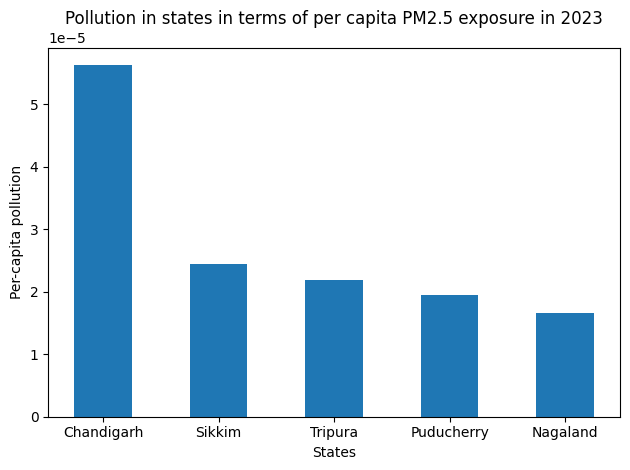

In [ ]:
#Q2
#Plot a bar chart showing the top 5 most polluted states in terms of per capita PM2.5 exposure in 2023.
population = pd.read_csv('State_data.csv')
data = pd.read_csv('Data.csv')
data = data[pd.to_datetime(data['Timestamp']).dt.year == 2023]
population.set_index('State', inplace = True)
avg_pollution_state = data.groupby('state')['PM2.5'].mean()
merged = avg_pollution_state.to_frame('avg_pollution_state').join(population, how = 'inner')
merged['per_capita_pollution'] = merged['avg_pollution_state']/merged['Population']
max_pollution = merged['per_capita_pollution'].sort_values().nlargest(5)

fig, ax = plt.subplots()
ax.bar(max_pollution.index, max_pollution.values, width = 0.5)
ax.set_xlabel('States')
ax.set_ylabel('Per-capita pollution')
ax.set_title('Pollution in states in terms of per capita PM2.5 exposure in 2023')
fig.tight_layout()
plt.show()


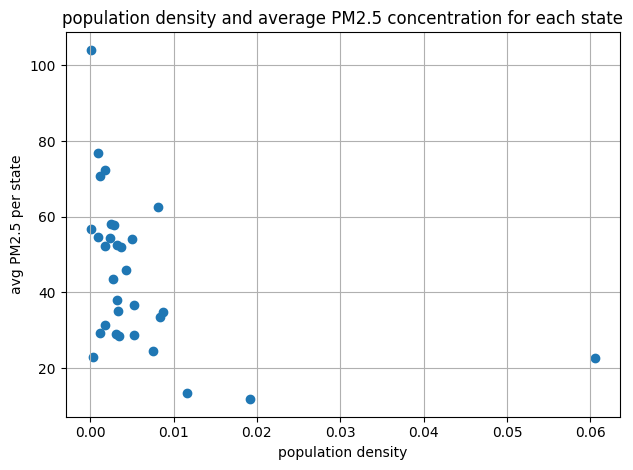

Since the data points do not follow a particular trend we cannot say that population density can alone predict the PM 2.5 levels


In [ ]:
#Q3
#Plot the relationship between population density and average PM2.5 concentration for each state. 
# What conclusion can you draw about the correlation between population density and pollution
population = pd.read_csv('State_data.csv')
data = pd.read_csv('Data.csv')

population.set_index('State', inplace = True)
avg_pm25 = data.groupby('state')['PM2.5'].mean()
population['density'] = population['Area (km2)']/population['Population']

merged = avg_pm25.to_frame('avg_pm25').join(population, how = 'inner')

fig, ax = plt.subplots()
ax.scatter(merged['density'], merged['avg_pm25'])
ax.grid(True)
ax.set_xlabel('population density')
ax.set_ylabel('avg PM2.5 per state')
ax.set_title('population density and average PM2.5 concentration for each state')
fig.tight_layout()
plt.show()

print("Since the data points do not follow a particular trend we cannot say that population density can alone predict the PM 2.5 levels")

# AREA BASED


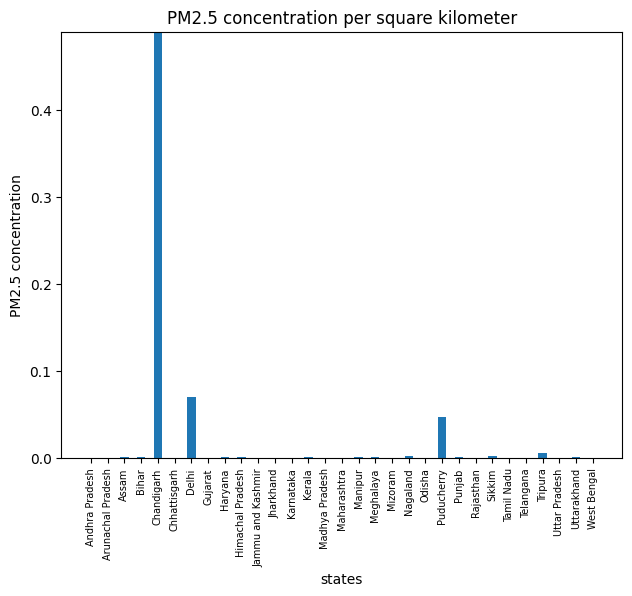

Chandigarh has the highest PM2.5 concentration per square kilometer.


In [ ]:
#Q1
#Which state has the highest PM2.5 concentration per square kilometer? Plot the pollution levels for all states relative to their area.
data = pd.read_csv('Data.csv')
population = pd.read_csv('State_data.csv')

population.set_index('State', inplace = True)
pm25_state = data.groupby('state')['PM2.5'].mean()

merged = pm25_state.to_frame('avg_pm25').join(population, how = 'inner')
merged['pm25_per_area'] = merged['avg_pm25']/merged['Area (km2)']

fig, ax = plt.subplots()
ax.bar(merged.index, merged['pm25_per_area'], width = 0.5)
fig.tight_layout()
ax.tick_params(axis='x', rotation=90, labelsize = 7)
ax.set_xlabel('states')
ax.set_ylabel('PM2.5 concentration')
ax.set_title('PM2.5 concentration per square kilometer')
ax.set_ylim(0,0.49)
plt.show()

max_pm25_conc = merged['pm25_per_area'].idxmax()
print(max_pm25_conc, 'has the highest PM2.5 concentration per square kilometer.')

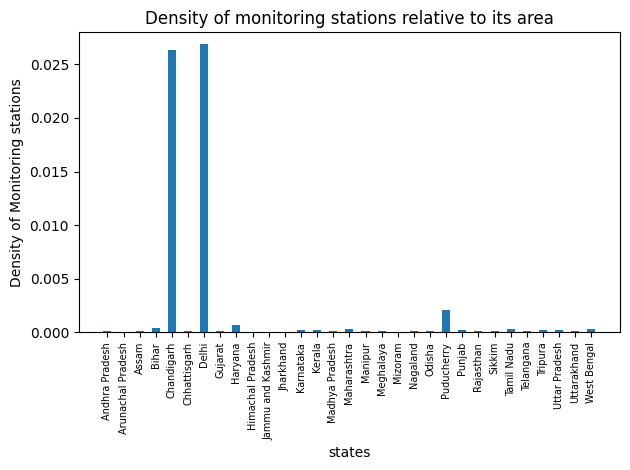

In [ ]:
#Q2
# Compare the total number of monitoring stations per square kilometer in each state. Identify the state with the highest density of 
# monitoring stations relative to its area. Show a bar plot where each bar represents a state, and the height shows the number of monitoring 
# stations per square kilometer.
data = pd.read_csv('Data.csv')
population = pd.read_csv('State_data.csv')

population.set_index('State', inplace = True)
stn_data = data.groupby('state')['station'].nunique()

merged = stn_data.to_frame('no_of_stations_pr_state').join(population, how = 'inner')
merged['density_monitoring_stn'] = merged['no_of_stations_pr_state']/merged['Area (km2)']

fig, ax = plt.subplots()
ax.bar(merged.index, merged['density_monitoring_stn'], width = 0.5)
ax.set_xlabel('states')
ax.set_ylabel('Density of Monitoring stations')
ax.set_title('Density of monitoring stations relative to its area')
ax.tick_params(axis = 'x', rotation = 90, labelsize = 7)
ax.set_ylim(0,0.028)
fig.tight_layout()
plt.show()

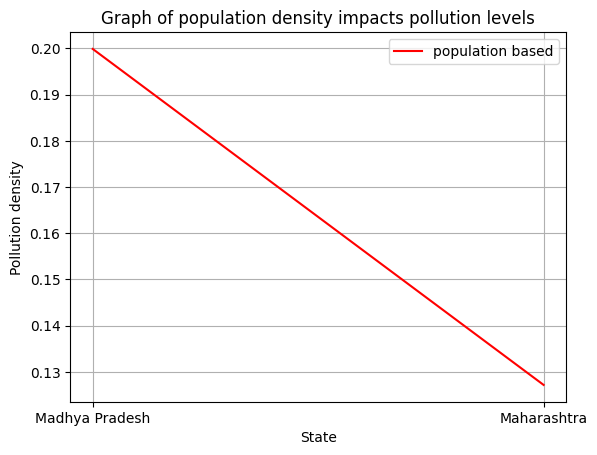

Maharashtra has highly urbanized and industrial regions like Mumbai, Pune, and Nashik, leading to more vehicular emissions, industrial pollutants, and construction dust. Madhya Pradesh, despite having large cities like Bhopal and Indore, has more rural and forested regions, which could contribute to better air quality.


In [ ]:
#Q3
# Compare the average PM2.5 levels between Maharashtra and Madhya Pradesh over the year 2021. Given that both states have similar area 
# sizes but different population densities, analyze how population density impacts pollution levels in these two states.
data = pd.read_csv('Data.csv')
population = pd.read_csv('State_data.csv')

data_2021 = data[pd.to_datetime(data['Timestamp']).dt.year == 2021]
pm25_avg = data_2021.groupby('state')['PM2.5'].mean()
population.set_index('State', inplace = True)
merged_data = pm25_avg.to_frame('pm25_avg').join(population, how = 'inner')
merged_data['population density'] = merged_data['Population']/merged_data['Area (km2)']
merged_data['pm25 population'] = merged_data['pm25_avg']/merged_data['population density']
mh_and_mp = merged_data.loc[merged_data.index.isin(['Maharashtra', 'Madhya Pradesh'])]


fig, ax = plt.subplots()
ax.plot(mh_and_mp.index, mh_and_mp['pm25 population'], label = 'population based', color = 'r')
ax.set_xlabel('State')
ax.set_ylabel('Pollution density')
ax.set_title('Graph of population density impacts pollution levels')
ax.grid(True)
ax.legend()
plt.show()


print("Maharashtra has highly urbanized and industrial regions like Mumbai, Pune, and Nashik, leading to more vehicular emissions, industrial pollutants, and construction dust. Madhya Pradesh, despite having large cities like Bhopal and Indore, has more rural and forested regions, which could contribute to better air quality.")

# FUNDING BASED

In [ ]:
#Q1
#Compare the average PM2.5 levels between states that received NCAP funding and those that did not in 2021.
data = pd.read_csv('Data.csv')
ncap = pd.read_csv('NCAP_Funding.csv')
ncap['Amount released during FY 2021-22'] = pd.to_numeric(ncap['Amount released during FY 2021-22'], errors='coerce')
data_2021 = data[pd.to_datetime(data['Timestamp']).dt.year == 2021]
data_2021_states = data_2021.groupby('state')['PM2.5'].mean()
data_2021_states = data_2021_states.to_frame('avg_pm25')

ncap_gpby_state = ncap.groupby('State')['Amount released during FY 2021-22'].mean()
no_funding = ncap_gpby_state[ncap_gpby_state.isna()]
funding = ncap_gpby_state[~ncap_gpby_state.isna()]

avg_pm25_funding = funding.values.mean()

avg_pm25_no_funding = no_funding.values.mean()

print("Average PM2.5 for states that received NCAP funding in 2021:", avg_pm25_funding)
print("Average PM2.5 for states that did not receive NCAP funding in 2021:", avg_pm25_no_funding)

Average PM2.5 for states that received NCAP funding in 2021: 3.050369408369409
Average PM2.5 for states that did not receive NCAP funding in 2021: nan


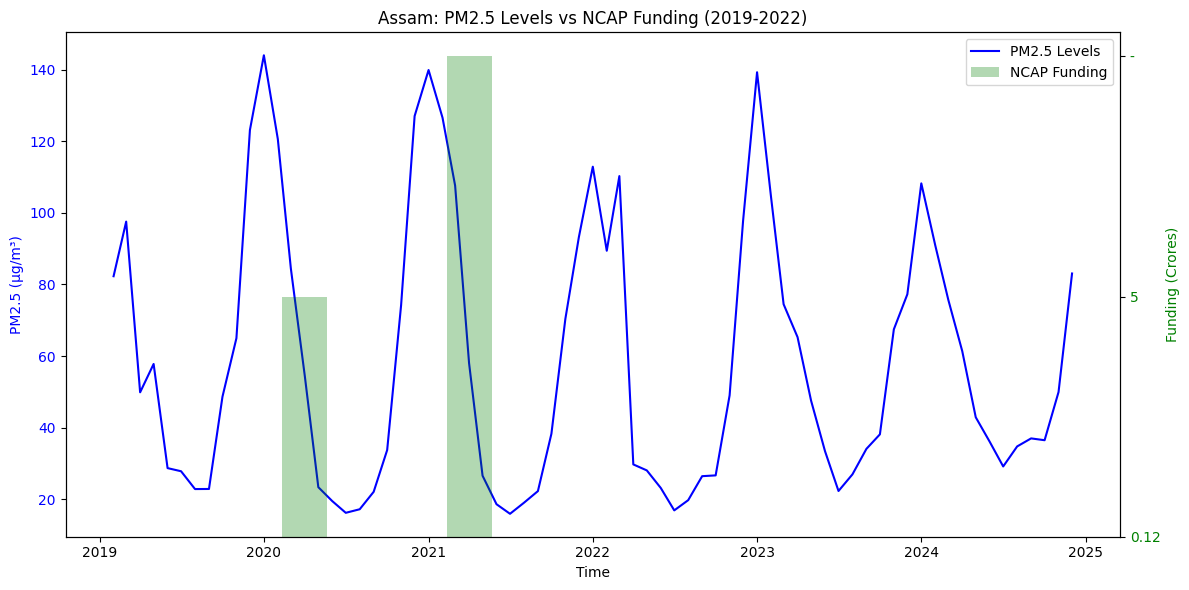

In [ ]:
#Q2
# Create a time series plot showing PM2.5 levels with an increment in NCAP funding for Assam. Has an increment of the financing led to 
# noticeable improvements in air quality?
data = pd.read_csv('Data.csv')
ncap_funding = pd.read_csv('NCAP_Funding.csv')

assam_data = data[data['state'] == 'Assam'].copy()
assam_data['Timestamp'] = pd.to_datetime(assam_data['Timestamp'])
monthly_pm25 = assam_data.groupby([assam_data['Timestamp'].dt.to_period('M')])['PM2.5'].mean().reset_index()
monthly_pm25['Timestamp'] = monthly_pm25['Timestamp'].dt.to_timestamp()
assam_funding = ncap_funding[ncap_funding['State'] == 'Assam'].iloc[0]
funding_years = ['2019-20', '2020-21', '2021-22']
funding_amounts = [
    assam_funding['Amount released during FY 2019-20'],
    assam_funding['Amount released during FY 2020-21'],
    assam_funding['Amount released during FY 2021-22']
]
# Create figure with two y-axes
fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()

# Plot PM2.5 levels
line1 = ax1.plot(monthly_pm25['Timestamp'], monthly_pm25['PM2.5'], 
                 color='blue', label='PM2.5 Levels')
ax1.set_xlabel('Time')
ax1.set_ylabel('PM2.5 (μg/m³)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Plot funding as vertical bars at specific dates
funding_dates = pd.to_datetime(['2019-04-01', '2020-04-01', '2021-04-01'])
bars = ax2.bar(funding_dates, funding_amounts, width=100, alpha=0.3, 
               color='green', label='NCAP Funding')
ax2.set_ylabel('Funding (Crores)', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

plt.title('Assam: PM2.5 Levels vs NCAP Funding (2019-2022)')
plt.tight_layout()
plt.show()


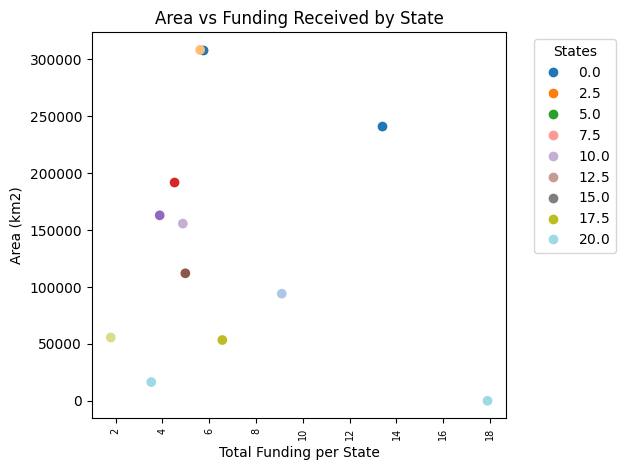

In [ ]:
#Q3
# Create a scatter plot to showcase the area versus funding received by a state. Mark every state with a different color and show 
# the legend outside the plot.
population = pd.read_csv('State_data.csv')
ncap = pd.read_csv('NCAP_Funding.csv')

x = ['Amount released during FY 2019-20','Amount released during FY 2020-21','Amount released during FY 2021-22']
ncap[x] = ncap[x].apply(pd.to_numeric, errors='coerce')
ncap_state = ncap.groupby('State')[x].mean()
ncap_state['Total Fund per state'] = ncap_state['Amount released during FY 2019-20'] + ncap_state['Amount released during FY 2020-21'] + ncap_state['Amount released during FY 2021-22']
population.set_index('State', inplace = True)
merged = population.join(ncap_state, how = 'inner')

fig, ax = plt.subplots()
scatter = ax.scatter(merged['Total Fund per state'], merged['Area (km2)'], c=range(len(merged)), cmap='tab20')
ax.tick_params(axis = 'x', rotation = 90, labelsize = 7)
handles, labels = scatter.legend_elements()
ax.legend(handles, labels, title="States", bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_xlabel('Total Funding per State')
ax.set_ylabel('Area (km2)')
ax.set_title('Area vs Funding Received by State')
plt.tight_layout()
plt.show()

# Miscellaneous Questions

In [ ]:
#Q1
#For the most polluted city in 2023 (highest average pollution in 2023), calculate the percentage of days with PM2.5 levels above the
# hazardous threshold (300 µg/m³)

data = pd.read_csv('Data.csv')
data['Timestamp'] = pd.to_datetime(data['Timestamp'], errors = 'coerce')
data_2023 = data[pd.to_datetime(data['Timestamp']).dt.year == 2023]
avg_pol = data_2023.groupby('city')['PM2.5'].mean()
city_w_max_pol = avg_pol.idxmax()

data_city_w_max_poll = data_2023[data_2023['city'] == city_w_max_pol]
pollution_gt_thn_300 = data_city_w_max_poll[data_city_w_max_poll['PM2.5'] > 300]

pct_days_lvl_abv_300 = pollution_gt_thn_300['Timestamp'].dt.date.nunique()/data_city_w_max_poll['Timestamp'].dt.date.nunique()*100
print(pct_days_lvl_abv_300, "is the percentage of days over the hazardous threshold of 300")

0.821917808219178 is the percentage of days over the hazardous threshold of 300


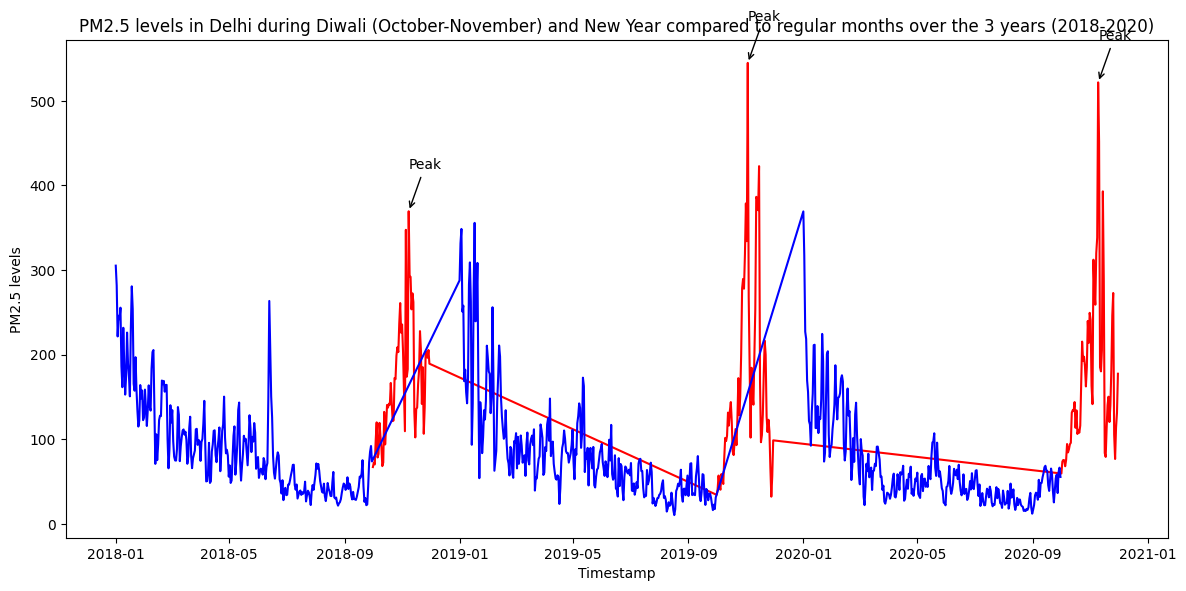

In [ ]:
# Q2
# Analyze the PM2.5 levels in Delhi during Diwali (October-November) and New Year compared to regular months over the 3 years (2018-2020).
# Do you observe any significant pollution spikes during these festivals? If spikes are observed, Can you mark these spikes using arrows?

data = pd.read_csv('Data.csv')
data = data[data['state'] == 'Delhi']
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data['year'] = data['Timestamp'].dt.year
data_diwali_del = data[(data['Timestamp'].dt.month == 10) | (data['Timestamp'].dt.month == 11)]
data_rmonths_del = data[data['Timestamp'].dt.month.isin([1, 2, 3, 4, 5, 6, 7, 8, 9])]

diwali_3years = data_diwali_del[(data_diwali_del['year'] >= 2018) & (data_diwali_del['year'] <= 2020)]
rmonths_3years = data_rmonths_del[(data_rmonths_del['year'] >= 2018) & (data_rmonths_del['year'] <= 2020)]

diwali_avg_pm = diwali_3years.groupby(diwali_3years['Timestamp'].dt.date)['PM2.5'].mean()
rmonths_avg_pm = rmonths_3years.groupby(rmonths_3years['Timestamp'].dt.date)['PM2.5'].mean()

plt.figure(figsize=(12, 6))
diwali_avg_pm.plot(label = 'Diwali (Oct-Nov)', color = 'red')
rmonths_avg_pm.plot(label = 'Regular Months', color = 'blue')

diwali_3years = diwali_3years.copy()
diwali_3years['date'] = diwali_3years['Timestamp'].dt.date

daily_avg = diwali_3years.groupby(['year', 'date'])['PM2.5'].mean().reset_index()

peak_rows = daily_avg.loc[daily_avg.groupby('year')['PM2.5'].idxmax()]

peak_rows.apply(lambda row: plt.annotate(
    'Peak',
    xy=(row['date'], row['PM2.5']),
    xytext=(row['date'], row['PM2.5'] + 50),
    arrowprops=dict(facecolor='black', arrowstyle='->'),
    color='black'),
    axis=1)
plt.ylabel('PM2.5 levels')
plt.title('PM2.5 levels in Delhi during Diwali (October-November) and New Year compared to regular months over the 3 years (2018-2020)')
plt.tight_layout()
plt.show()


Highest funding was recieved by Assam


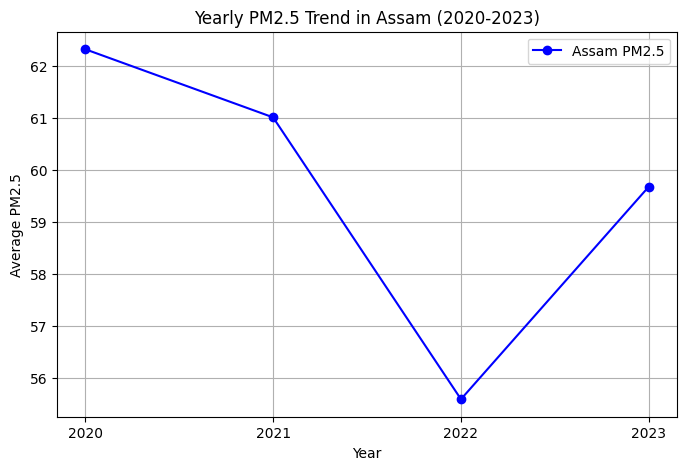

Assam had the highest funding for the year 2020, its air pollution decreased during COVID years but we see a increase in it approaching 2023


In [ ]:
#Q3
#Identify the state that received the highest NCAP funding in 2020 and determine if its air pollution levels improved significantly by 2023. 
#Use a line graph to compare yearly average PM2.5 trend

data = pd.read_csv('Data.csv')
ncap = pd.read_csv('NCAP_Funding.csv')

ncap.set_index('State', inplace = True)
ncap['Amount released during FY 2020-21'] = pd.to_numeric(ncap['Amount released during FY 2020-21'], errors = 'coerce')
ncap_max_state = ncap['Amount released during FY 2020-21'].idxmax()

print('Highest funding was recieved by', ncap_max_state)
data['year'] = pd.to_datetime(data['Timestamp']).dt.year
state_data = data[data['state'] == ncap_max_state]
yearly_avg_pm25 = state_data.groupby('year')['PM2.5'].mean().loc[2020:2023]

plt.figure(figsize=(8, 5))
plt.plot(yearly_avg_pm25.index, yearly_avg_pm25.values, marker='o', linestyle='-', color='blue', label=f'{ncap_max_state} PM2.5')
plt.xlabel('Year')
plt.ylabel('Average PM2.5')
plt.title(f'Yearly PM2.5 Trend in {ncap_max_state} (2020-2023)')
plt.xticks(yearly_avg_pm25.index)
plt.legend()
plt.grid(True)
plt.show()

print('Assam had the highest funding for the year 2020, its air pollution decreased during COVID years but we see a increase in it approaching 2023')


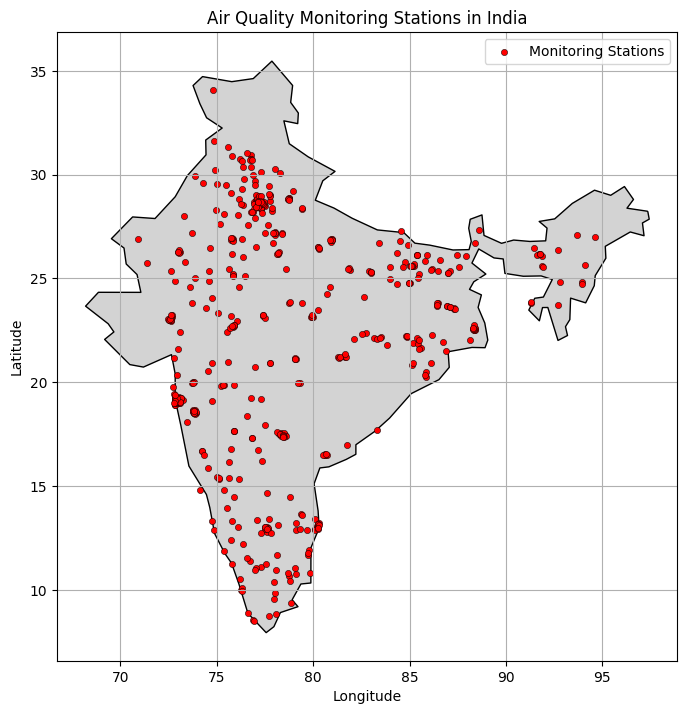

In [ ]:
# Q4
# Draw the map of India and plot the sensor locations on the map

import geopandas as gpd
import seaborn as sns

data = pd.read_csv('Data.csv')
shapefile_path = "ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp"  
world_map = gpd.read_file(shapefile_path)

india_map = world_map[world_map["ADMIN"] == "India"]

sensor_locations = data[["latitude", "longitude"]].dropna().drop_duplicates()

# Plot India's map and sensor locations
fig, ax = plt.subplots(figsize=(8, 10))

india_map.plot(ax=ax, color="lightgrey", edgecolor="black")

# Overlay air quality monitoring stations
sns.scatterplot(x=sensor_locations["longitude"], y=sensor_locations["latitude"], 
                color="red", edgecolor="black", s=20, label="Monitoring Stations", ax=ax)

# Formatting
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Air Quality Monitoring Stations in India")
plt.legend()
plt.grid(True)

plt.show()

# Tell us something new

Something which is out of the box is to know about the state which is not useful even after recieving the NCAP fundings have the same result as the cities which did not recieve funding

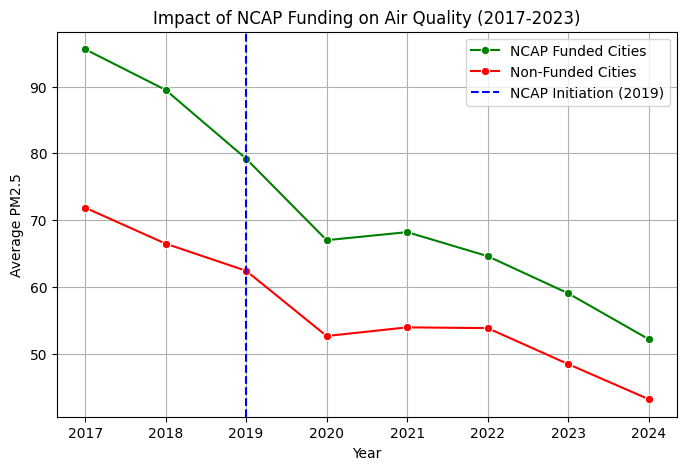

In [ ]:
ncap_funding = pd.read_csv('NCAP_Funding.csv')
data = pd.read_csv('Data.csv')
funded_cities = ncap_funding["City"].str.lower().unique()
data["NCAP_Funded"] = data["city"].str.lower().isin(funded_cities)
data['Year'] = pd.to_datetime(data['Timestamp']).dt.year
funding_impact = data.groupby(["Year", "NCAP_Funded"])["PM2.5"].mean().unstack()

plt.figure(figsize=(8,5))
sns.lineplot(x=funding_impact.index, y=funding_impact[True], label="NCAP Funded Cities", marker="o", color="green")
sns.lineplot(x=funding_impact.index, y=funding_impact[False], label="Non-Funded Cities", marker="o", color="red")

plt.axvline(x=2019, linestyle="--", color="blue", label="NCAP Initiation (2019)") #ncap did not give funding till now
plt.xlabel("Year")
plt.ylabel("Average PM2.5")
plt.title("Impact of NCAP Funding on Air Quality (2017-2023)")
plt.legend()
plt.grid(True)
plt.show()

